# train
test.ipynd는 따로 생성.

In [1]:
# 06딥러닝
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# 분석
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

2025-05-15 17:27:28.302129: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-15 17:27:28.316091: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747297648.329961   37375 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747297648.333233   37375 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747297648.343087   37375 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
data = pd.read_csv("./data/wine_train.csv")
data

,와인_종류,알코올_도수,사과산_함량,재_함량,재의_알칼리도,마그네슘_함량,총_페놀_함량,플라보노이드_함량,비플라보노이드_페놀_함량,프로안토시아닌_함량,색_강도,색조,희석_와인의_투과율_OD280_OD315,프롤린_함량
0,1,13.76,1.53,2.70,19.5,132,2.95,2.74,0.50,1.35,5.40,1.25,3.00,1235
1,2,12.67,0.98,2.24,18.0,99,2.20,1.94,0.30,1.46,2.62,1.23,3.16,450
2,1,13.58,1.66,2.36,19.1,106,2.86,3.19,0.22,1.95,6.90,1.09,2.88,1515
3,2,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410
4,1,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,2,12.43,1.53,2.29,21.5,86,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352
102,3,12.20,3.03,2.32,19.0,96,1.25,0.49,0.40,0.73,5.50,0.66,1.83,510
103,1,13.51,1.80,2.65,19.0,110,2.35,2.53,0.29,1.54,4.20,1.10,2.87,1095
104,2,12.70,3.87,2.40,23.0,101,2.83,2.55,0.43,1.95,2.57,1.19,3.13,463


In [3]:
data['와인_종류'].value_counts()

와인_종류
2    42
1    35
3    29
Name: count, dtype: int64

In [4]:
# 결측체크
print(data.head())
print("data.info()")
print(data.info())

   와인_종류  알코올_도수  사과산_함량  재_함량  재의_알칼리도  마그네슘_함량  총_페놀_함량  플라보노이드_함량  \
0      1   13.76    1.53  2.70     19.5      132     2.95       2.74   
1      2   12.67    0.98  2.24     18.0       99     2.20       1.94   
2      1   13.58    1.66  2.36     19.1      106     2.86       3.19   
3      2   13.86    1.51  2.67     25.0       86     2.95       2.86   
4      1   13.05    2.05  3.22     25.0      124     2.63       2.68   

   비플라보노이드_페놀_함량  프로안토시아닌_함량  색_강도    색조  희석_와인의_투과율_OD280_OD315  프롤린_함량  
0           0.50        1.35  5.40  1.25                    3.00    1235  
1           0.30        1.46  2.62  1.23                    3.16     450  
2           0.22        1.95  6.90  1.09                    2.88    1515  
3           0.21        1.87  3.38  1.36                    3.16     410  
4           0.47        1.92  3.58  1.13                    3.20     830  
data.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 14 columns):


<Axes: >

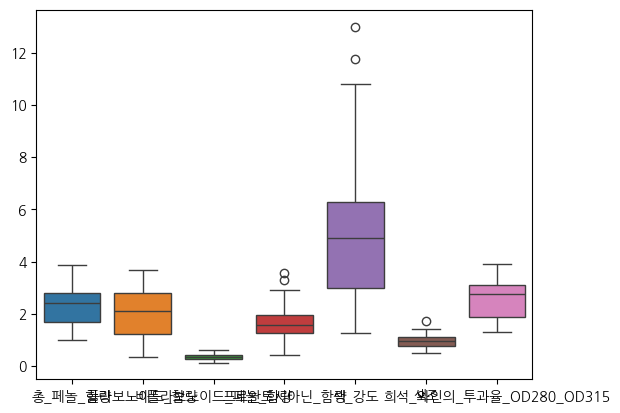

In [5]:
# 이상치 체크
sns.boxplot(data.iloc[:,6:-1]) ## 이정도면 별로없는편

In [6]:
## 와인종류가 종속변수
# Xy 할당
X = data.drop('와인_종류',axis=1)
y= data['와인_종류']
#X

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
## 혹시몰라서 stratify를 넣는다는게 무슨뜻일깡
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, stratify=y_valid, random_state=42)


In [9]:
# 스케일링
from sklearn.preprocessing import MinMaxScaler

In [10]:
mms=MinMaxScaler() # 메모리상에 있는 존재인데 mms를 저장해야함
X_train_temp = mms.fit_transform(X_train)
X_test_temp = mms.transform(X_test)

mms_X_train = pd.DataFrame(X_train_temp, columns=X_train.columns, index=X_train.index)
mms_X_test= pd.DataFrame(X_test_temp, columns=X_test.columns, index=X_test.index)



In [11]:
# 확인용
mms_X_test

,알코올_도수,사과산_함량,재_함량,재의_알칼리도,마그네슘_함량,총_페놀_함량,플라보노이드_함량,비플라보노이드_페놀_함량,프로안토시아닌_함량,색_강도,색조,희석_와인의_투과율_OD280_OD315,프롤린_함량
65,0.613158,0.336066,0.532258,0.573171,0.064103,0.057692,0.003125,0.48,0.076923,0.368601,0.178862,0.440154,0.405821
19,0.113158,0.577869,0.247312,0.542683,0.294872,0.742308,0.653125,0.22,1.104895,0.138225,0.219512,0.571429,0.229588
11,0.592105,0.147541,0.795699,0.298780,0.333333,0.519231,0.684375,0.42,0.328671,0.283276,0.495935,0.559846,0.486661
8,0.321053,0.165984,0.408602,0.512195,-0.051282,0.153846,0.481250,0.48,0.423077,0.180887,0.422764,0.710425,0.187551
87,0.500000,0.387295,0.720430,0.634146,0.153846,0.111538,0.003125,0.80,0.115385,0.283276,0.235772,0.378378,0.260307
100,0.531579,0.602459,0.516129,0.725610,0.012821,0.153846,0.343750,0.96,0.419580,0.300341,0.292683,0.262548,0.191593
64,0.884211,0.194672,0.586022,0.243902,0.153846,0.480769,0.634375,0.34,0.545455,0.338737,0.439024,0.868726,0.818108
95,0.276316,0.186475,0.516129,0.481707,-0.038462,0.134615,0.315625,0.78,0.426573,0.095563,0.487805,0.362934,0.163298
12,0.310526,0.055328,0.209677,0.378049,0.858974,0.230769,0.246875,0.02,0.727273,0.133959,0.650407,0.671815,0.355699
78,0.650000,0.450820,0.677419,0.817073,0.500000,0.057692,0.337500,0.18,0.290210,0.624573,0.089431,-0.011583,0.179466


In [12]:
# 확인용
mms_X_train

,알코올_도수,사과산_함량,재_함량,재의_알칼리도,마그네슘_함량,총_페놀_함량,플라보노이드_함량,비플라보노이드_페놀_함량,프로안토시아닌_함량,색_강도,색조,희석_와인의_투과율_OD280_OD315,프롤린_함량
79,0.700000,0.479508,0.634409,0.573171,0.294872,0.223077,0.021875,0.74,0.132867,0.392491,0.390244,0.189189,0.324980
54,0.297368,0.141393,0.510753,0.743902,0.076923,0.203846,0.375000,0.60,0.398601,0.099829,0.691057,0.359073,0.175424
98,0.755263,0.155738,0.408602,0.329268,0.217949,0.711538,0.906250,0.16,0.601399,0.411263,0.349593,0.772201,0.571544
20,0.207895,0.163934,0.279570,0.542683,0.025641,0.480769,0.359375,0.48,0.349650,0.066553,0.373984,0.428571,0.110752
92,0.823684,0.325820,0.602151,0.573171,0.089744,0.165385,0.065625,0.62,0.286713,0.718430,0.113821,0.146718,0.308812
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,0.744737,0.088115,0.489247,0.329268,0.179487,0.665385,0.831250,0.18,0.500000,0.506826,0.430894,0.857143,0.620049
16,0.413158,0.086066,0.290323,0.481707,0.051282,0.076923,0.271875,0.32,0.325175,0.099829,0.455285,0.555985,0.229588
59,0.484211,0.756148,0.602151,0.664634,0.025641,0.173077,0.050000,0.68,0.153846,0.543515,0.048780,0.204633,0.280517
37,0.000000,0.120902,0.451613,0.664634,0.012821,0.465385,0.525000,0.78,0.555944,0.052901,1.000000,0.594595,0.104285


In [13]:
# y데이터의 1핫인코딩
y_train.value_counts() # y밸류의 종류는3가지로 확인

와인_종류
2    29
1    25
3    20
Name: count, dtype: int64

In [14]:
## 원핫인코딩
y_train=pd.get_dummies(y_train)

In [15]:
## 원핫인코딩
y_test=pd.get_dummies(y_test)

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [17]:
## 
n_class=y_train.shape[1]

model = Sequential()   
model.add(Input(shape=(mms_X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(n_class, activation='softmax'))
model.summary()

I0000 00:00:1747297651.629848   37375 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1347 MB memory:  -> device: 0, name: NVIDIA GeForce MX450, pci bus id: 0000:01:00.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,555 (13.89 KB)

 Trainable params: 3,555 (13.89 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000


I0000 00:00:1747297653.407363   37423 service.cc:152] XLA service 0x7f97d400b380 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747297653.407391   37423 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce MX450, Compute Capability 7.5
2025-05-15 17:27:33.426825: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1747297653.572657   37423 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.4375 - loss: 1.1072

I0000 00:00:1747297654.675946   37423 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 381ms/step - accuracy: 0.5389 - loss: 1.0953 - val_accuracy: 0.4375 - val_loss: 1.0827
Epoch 2/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6539 - loss: 1.0605 - val_accuracy: 0.5000 - val_loss: 1.0608
Epoch 3/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7724 - loss: 1.0343 - val_accuracy: 0.7500 - val_loss: 1.0402
Epoch 4/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9129 - loss: 1.0099 - val_accuracy: 0.8750 - val_loss: 1.0165
Epoch 5/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9025 - loss: 0.9842 - val_accuracy: 0.8750 - val_loss: 0.9888
Epoch 6/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8928 - loss: 0.9538 - val_accuracy: 0.9375 - val_loss: 0.9578
Epoch 7/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9060 - loss: 0.9173 - val_accuracy: 0.9375 - val_loss: 0.9241
Epoch 8/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8787 - loss: 0.8742 - val_accuracy: 0.7500 - val_loss: 0.8

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.0340 - val_accuracy: 0.9375 - val_loss: 0.1386
Epoch 52/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.0289 - val_accuracy: 0.9375 - val_loss: 0.1442
Epoch 53/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.0215 - val_accuracy: 0.9375 - val_loss: 0.1452
Epoch 54/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.0247 - val_accuracy: 0.9375 - val_loss: 0.1590
Epoch 55/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.0295 - val_accuracy: 0.9375 - val_loss: 0.1596
Epoch 56/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.0206 - val_accuracy: 0.9375 - val_loss: 0.1501
Epoch 57/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.0184 - val_accuracy: 0.9375 - val_loss: 0.1494
Epoch 58/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.0185 - val_accuracy: 0.9375 - val_los

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 0.9375 - val_loss: 0.1608
Epoch 102/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 0.9375 - val_loss: 0.1615
Epoch 103/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 0.9375 - val_loss: 0.1571
Epoch 104/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0.9375 - val_loss: 0.1565
Epoch 105/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 0.9375 - val_loss: 0.1602
Epoch 106/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 0.9375 - val_loss: 0.1607
Epoch 107/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 0.9375 - val_loss: 0.1609
Epoch 108/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 0.9375 - 

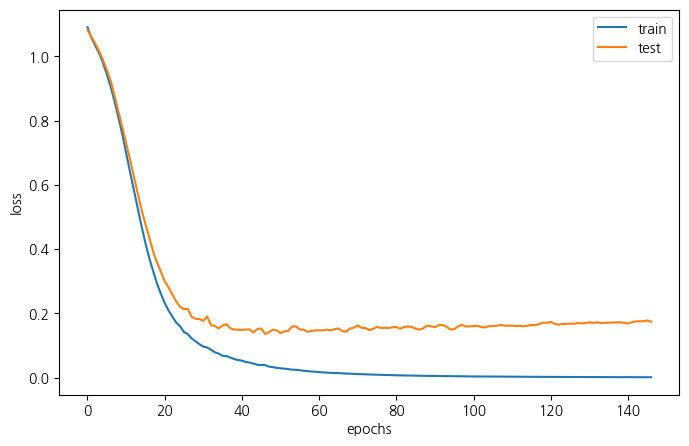

In [18]:
## 컴파일 - 파라미터 지정

model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

early_stop= EarlyStopping(patience=100)

file_path="./model/wine_best_model.keras"
## 파일명에 loss수치를 나타낼것인지
#"./model/wine_{val_loss:.4f}_{epoch:04d}.keras"

model_save= ModelCheckpoint(filepath=file_path, save_best_only=True)

history= model.fit(mms_X_train, y_train,
                  epochs=1000, batch_size=16,
                  validation_data=(mms_X_test, y_test),
                  callbacks=[early_stop, model_save])

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['train', 'test'])
plt.show()

# 머신러닝 스케일러와 모델 저장하기

In [19]:
import joblib

In [21]:
joblib.dump(mms, "./model/MinMax_info2.joblib" ) #아무 확장자나 다되나? d0d

['./model/MinMax_info2.joblib']

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rfc = RandomForestClassifier(max_depth=3, n_estimators=500,n_jobs=-1, random_state=42)
rfc.fit(mms_X_train, y_train)
pred = rfc.predict(mms_X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.86      0.92         7
           2       0.80      1.00      0.89         4

   micro avg       0.94      0.94      0.94        16
   macro avg       0.93      0.95      0.94        16
weighted avg       0.95      0.94      0.94        16
 samples avg       0.94      0.94      0.94        16



In [23]:
joblib.dump(rfc, "./model/rfc_model.joblib")

['./model/rfc_model.joblib']